In [108]:
# the usual suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [109]:
X = pd.read_csv('./data/processed_first_X_17feat.csv')
y = pd.read_csv('./data/processed_first_y_17feat.csv')

In [110]:
train_df = X.copy()
train_df['diabetes'] = y
train_df.head()

,d1_glucose_max,glucose_apache,h1_glucose_max,h1_glucose_min,bmi,weight,d1_bun_max,bun_apache,d1_bun_min,d1_glucose_min,d1_creatinine_max,d1_creatinine_min,creatinine_apache,arf_apache,d1_potassium_max,age,diabetes
0,156.0,127.0,156.0,156.0,31.242126,77.5,12.0,12.0,12.0,127.0,0.70,0.70,0.70,0,4.8,75.0,0
1,175.0,118.0,140.0,134.0,20.976012,58.5,12.0,19.0,12.0,118.0,0.80,0.80,0.97,0,3.7,81.0,1
2,218.0,218.0,140.0,134.0,28.622530,80.4,7.0,7.0,7.0,129.0,0.68,0.68,0.68,0,4.0,60.0,1
3,97.0,97.0,140.0,134.0,23.474146,68.0,31.0,31.0,31.0,97.0,2.64,2.64,2.64,1,3.9,83.0,0
4,136.0,108.0,136.0,136.0,25.827271,70.4,20.0,20.0,20.0,108.0,1.20,1.20,1.20,0,4.2,74.0,0


In [ ]:
sns.pairplot(train_df[:,:10], hue='diabetes')

In [112]:
X_train, X_val, y_train, y_val = train_test_split(X.iloc[:,:10], y, test_size=0.20, random_state=18)

In [113]:
y_train = np.array(y_train).ravel()
y_val = np.array(y_val).ravel()

## Logistic Regression

### Baseline Score With 1 Feature: .798

In [125]:
X_train_1 = X_train[['d1_glucose_max']]
X_val_1 = X_val[['d1_glucose_max']]

In [127]:
# without regularization
lm1 = LogisticRegression(C=1000)
lm1.fit(X_train_1, y_train)

LogisticRegression(C=1000)

In [186]:
y_val_hat_1 = lm1.predict(X_val_1)

In [128]:
print(lm1.score(X_train_1, y_train))
print(lm1.score(X_val_1,y_val))

0.7984393757503001
0.7985594237695078


In [116]:
lm1.coef_, lm1.intercept_

(array([[0.01098291]]), array([-3.31716356]))

In [205]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_hat_1 = (model.predict_proba(X_val_1)[:, 1] >= threshold)
    diabetes_confusion_1 = confusion_matrix(y_val, y_hat_1)
    plt.figure(dpi=150)
    sns.heatmap(diabetes_confusion_1, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['pred no', 'pred yes'],
           yticklabels=['actual no', 'actual yes']);
    plt.title('baseline confusion matrix')
    plt.savefig('./project-checkpoints/baseline_confusion.png')
    # plt.xlabel('prediction')
    # plt.ylabel('actual')

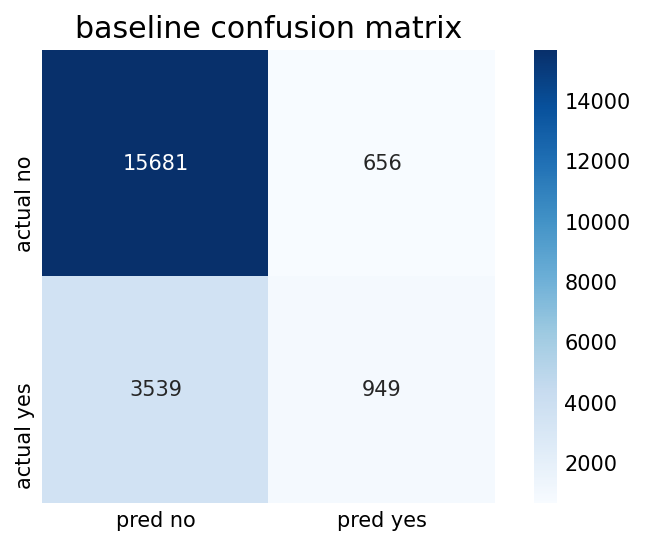

In [206]:
make_confusion_matrix(lm1)

In [187]:
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_val, y_val_hat_1), 
                                                     recall_score(y_val, y_val_hat_1)))

Default threshold:
Precision: 0.5913,   Recall: 0.2115


In [ ]:
plt.savefig

### Score With 10 Features: .800

In [117]:
sts = StandardScaler()
sts.fit(X_train)

StandardScaler()

In [118]:
X_train_scale = sts.transform(X_train)
X_val_scale = sts.transform(X_val)

In [171]:
# without regularization
lm10 = LogisticRegression(C=10)
lm10.fit(X_train_scale, y_train)

LogisticRegression(C=10)

In [193]:
y_val_hat = lm10.predict(X_val_scale)

In [172]:
print(lm10.score(X_train_scale, y_train))
print(lm10.score(X_val_scale,y_val))

0.8005282112845138
0.8004801920768307


In [207]:
def make_confusion_matrix_10(model, threshold=0.5):
    y_hat = (model.predict_proba(X_val_scale)[:, 1] >= threshold)
    diabetes_confusion = confusion_matrix(y_val, y_hat)
    
    plt.figure(dpi=150)
    sns.heatmap(diabetes_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['pred no', 'pred yes'],
           yticklabels=['actual no', 'actual yes']);
    plt.title('10 feature confusion matrix')
    plt.savefig('./project-checkpoints/tenfeat_confusion.png')
    
    # plt.xlabel('prediction')
    # plt.ylabel('actual')

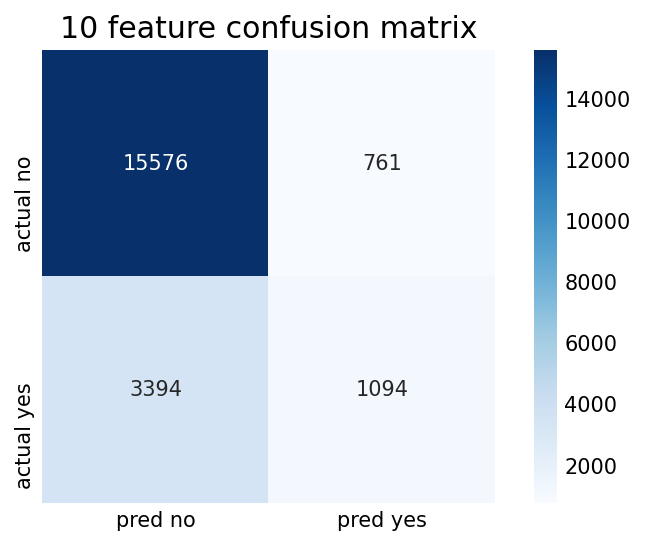

In [208]:
make_confusion_matrix_10(lm10,threshold=.5)

In [194]:
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_val, y_val_hat), 
                                                     recall_score(y_val, y_val_hat)))

Default threshold:
Precision: 0.5898,   Recall: 0.2438


## Random Forest